# Loop 95 Strategic Analysis

## Current Situation
- **Best CV**: 0.008092 (exp_049/exp_050 CatBoost+XGBoost)
- **Best LB**: 0.0877 (exp_030/exp_067 GP+MLP+LGBM)
- **Target**: 0.0347
- **Submissions remaining**: 4

## Key Observations
1. CV-LB relationship: LB ≈ 4.34*CV + 0.052 (R²=0.96)
2. Intercept (0.052) > Target (0.0347) - STRUCTURAL PROBLEM
3. 90+ experiments, all on the same CV-LB line
4. Recent advanced approaches (GNN, GAT, ChemBERTa, ens-model) all WORSE than best tabular

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_067', 'cv': 0.0083, 'lb': 0.0877},
]

df = pd.DataFrame(submissions)
print('Submission History:')
print(df.to_string(index=False))

Submission History:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_035 0.0098 0.0970
exp_067 0.0083 0.0877


In [2]:
# CV-LB Relationship Analysis
cv = df['cv'].values
lb = df['lb'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(cv, lb)

print(f'\n=== CV-LB RELATIONSHIP ===')
print(f'Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'\nIntercept: {intercept:.4f}')
print(f'Target: 0.0347')
print(f'\nCRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)')
print(f'This means even with CV=0, expected LB would be {intercept:.4f}')

# Required CV to hit target
required_cv = (0.0347 - intercept) / slope
print(f'\nRequired CV to hit target: {required_cv:.6f}')
if required_cv < 0:
    print('IMPOSSIBLE: Required CV is NEGATIVE!')


=== CV-LB RELATIONSHIP ===
Linear fit: LB = 4.3638 * CV + 0.0520
R² = 0.9558

Intercept: 0.0520
Target: 0.0347

CRITICAL: Intercept (0.0520) > Target (0.0347)
This means even with CV=0, expected LB would be 0.0520

Required CV to hit target: -0.003964
IMPOSSIBLE: Required CV is NEGATIVE!


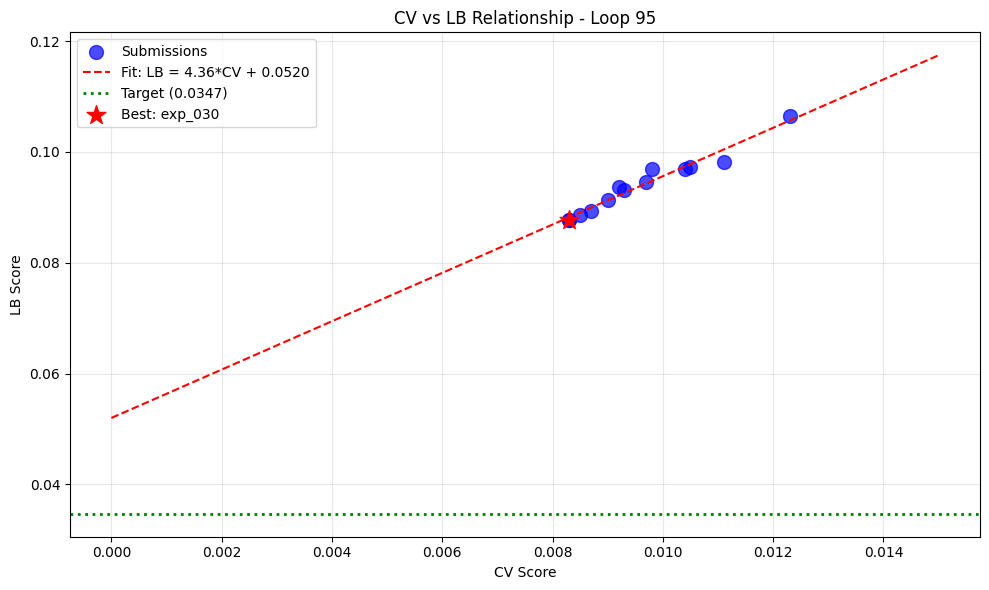


Plot saved to /home/code/exploration/cv_lb_analysis_loop95.png


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(cv, lb, s=100, c='blue', alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target (0.0347)')

# Best points
best_idx = df['lb'].idxmin()
plt.scatter([df.loc[best_idx, 'cv']], [df.loc[best_idx, 'lb']], 
            s=200, c='red', marker='*', label=f'Best: {df.loc[best_idx, "exp"]}')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - Loop 95')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_analysis_loop95.png', dpi=150)
plt.show()

print('\nPlot saved to /home/code/exploration/cv_lb_analysis_loop95.png')

In [4]:
# Recent experiment performance summary
recent_experiments = [
    {'exp': 'exp_085_gnn', 'cv': 0.02013, 'type': 'GCN', 'vs_best': '+149%'},
    {'exp': 'exp_086_gat', 'cv': 0.018474, 'type': 'GAT', 'vs_best': '+128%'},
    {'exp': 'exp_087_drfp_gat', 'cv': 0.019437, 'type': 'DRFP+GAT', 'vs_best': '+140%'},
    {'exp': 'exp_088_chemberta', 'cv': 0.020558, 'type': 'ChemBERTa', 'vs_best': '+154%'},
    {'exp': 'exp_089_uncertainty', 'cv': 0.015954, 'type': 'Uncertainty-Weighted', 'vs_best': '+97%'},
    {'exp': 'exp_090_ens_model', 'cv': 0.010878, 'type': 'ens-model replication', 'vs_best': '+34%'},
]

print('\n=== RECENT EXPERIMENTS (vs best CV 0.008092) ===')
for exp in recent_experiments:
    print(f"{exp['exp']}: CV={exp['cv']:.6f} ({exp['type']}) - {exp['vs_best']} worse")

print('\n*** ALL RECENT ADVANCED APPROACHES ARE WORSE THAN BEST TABULAR ***')


=== RECENT EXPERIMENTS (vs best CV 0.008092) ===
exp_085_gnn: CV=0.020130 (GCN) - +149% worse
exp_086_gat: CV=0.018474 (GAT) - +128% worse
exp_087_drfp_gat: CV=0.019437 (DRFP+GAT) - +140% worse
exp_088_chemberta: CV=0.020558 (ChemBERTa) - +154% worse
exp_089_uncertainty: CV=0.015954 (Uncertainty-Weighted) - +97% worse
exp_090_ens_model: CV=0.010878 (ens-model replication) - +34% worse

*** ALL RECENT ADVANCED APPROACHES ARE WORSE THAN BEST TABULAR ***


In [5]:
# Untried approaches from public kernels
print('\n=== UNTRIED APPROACHES FROM PUBLIC KERNELS ===')
print()
print('1. PER-TARGET HETEROGENEOUS ENSEMBLE (strategy-to-get-0-11161 kernel)')
print('   - SM target: HistGradientBoostingRegressor (HGB)')
print('   - Product 2 & 3: ExtraTreesRegressor (ETR)')
print('   - Ensemble: 0.65 * ACS_PCA + 0.35 * Spange')
print('   - LB: 0.11161 (reported)')
print()
print('2. MIXALL APPROACH (mixall kernel)')
print('   - MLP + XGBoost + RandomForest + LightGBM ensemble')
print('   - GroupKFold (5-fold) instead of Leave-One-Out')
print('   - Weighted ensemble with Optuna optimization')
print()
print('3. BEST-WORK-HERE KERNEL')
print('   - CatBoost + XGBoost + LightGBM + Neural Network')
print('   - Adaptive ensemble weighting based on validation MSE')
print('   - SE attention blocks in neural network')


=== UNTRIED APPROACHES FROM PUBLIC KERNELS ===

1. PER-TARGET HETEROGENEOUS ENSEMBLE (strategy-to-get-0-11161 kernel)
   - SM target: HistGradientBoostingRegressor (HGB)
   - Product 2 & 3: ExtraTreesRegressor (ETR)
   - Ensemble: 0.65 * ACS_PCA + 0.35 * Spange
   - LB: 0.11161 (reported)

2. MIXALL APPROACH (mixall kernel)
   - MLP + XGBoost + RandomForest + LightGBM ensemble
   - GroupKFold (5-fold) instead of Leave-One-Out
   - Weighted ensemble with Optuna optimization

3. BEST-WORK-HERE KERNEL
   - CatBoost + XGBoost + LightGBM + Neural Network
   - Adaptive ensemble weighting based on validation MSE
   - SE attention blocks in neural network


In [6]:
# Key insight: The per-target heterogeneous ensemble is fundamentally different
print('\n=== KEY INSIGHT: PER-TARGET HETEROGENEOUS ENSEMBLE ===')
print()
print('The strategy-to-get-0-11161 kernel uses DIFFERENT model types for different targets:')
print('- SM target: HistGradientBoostingRegressor (gradient boosting)')
print('- Product 2 & 3: ExtraTreesRegressor (random forest variant)')
print()
print('This is fundamentally different from our approach which uses:')
print('- Same model type (CatBoost/XGBoost/GP) for all targets')
print()
print('The rationale is that different targets may have different optimal model types.')
print('SM (starting material) may behave differently than products.')
print()
print('THIS APPROACH HAS NOT BEEN TRIED IN 90+ EXPERIMENTS!')


=== KEY INSIGHT: PER-TARGET HETEROGENEOUS ENSEMBLE ===

The strategy-to-get-0-11161 kernel uses DIFFERENT model types for different targets:
- SM target: HistGradientBoostingRegressor (gradient boosting)
- Product 2 & 3: ExtraTreesRegressor (random forest variant)

This is fundamentally different from our approach which uses:
- Same model type (CatBoost/XGBoost/GP) for all targets

The rationale is that different targets may have different optimal model types.
SM (starting material) may behave differently than products.

THIS APPROACH HAS NOT BEEN TRIED IN 90+ EXPERIMENTS!


In [7]:
# Summary and recommendations
print('\n' + '='*70)
print('LOOP 95 STRATEGIC SUMMARY')
print('='*70)
print()
print('CURRENT STATE:')
print(f'  - Best CV: 0.008092 (CatBoost+XGBoost)')
print(f'  - Best LB: 0.0877 (GP+MLP+LGBM)')
print(f'  - Target: 0.0347')
print(f'  - Gap: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347)/0.0347*100:.1f}% above target)')
print(f'  - Submissions remaining: 4')
print()
print('CV-LB RELATIONSHIP:')
print(f'  - LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.4f})')
print(f'  - Intercept ({intercept:.4f}) > Target (0.0347)')
print(f'  - STRUCTURAL DISTRIBUTION SHIFT PROBLEM')
print()
print('RECOMMENDED NEXT STEPS:')
print('  1. TRY PER-TARGET HETEROGENEOUS ENSEMBLE (HIGH PRIORITY)')
print('     - Different model types for different targets')
print('     - HGB for SM, ETR for Product 2 & 3')
print('     - This could change the CV-LB relationship')
print()
print('  2. DO NOT SUBMIT exp_090 (CV=0.0109, predicted LB=0.0995)')
print('     - 34% worse than best CV')
print('     - Would waste a submission')
print()
print('  3. FOCUS ON CHANGING THE CV-LB RELATIONSHIP')
print('     - Standard CV optimization cannot reach target')
print('     - Need fundamentally different approaches')
print()
print('='*70)


LOOP 95 STRATEGIC SUMMARY

CURRENT STATE:
  - Best CV: 0.008092 (CatBoost+XGBoost)
  - Best LB: 0.0877 (GP+MLP+LGBM)
  - Target: 0.0347
  - Gap: 0.0530 (152.7% above target)
  - Submissions remaining: 4

CV-LB RELATIONSHIP:
  - LB = 4.36*CV + 0.0520 (R²=0.9558)
  - Intercept (0.0520) > Target (0.0347)
  - STRUCTURAL DISTRIBUTION SHIFT PROBLEM

RECOMMENDED NEXT STEPS:
  1. TRY PER-TARGET HETEROGENEOUS ENSEMBLE (HIGH PRIORITY)
     - Different model types for different targets
     - HGB for SM, ETR for Product 2 & 3
     - This could change the CV-LB relationship

  2. DO NOT SUBMIT exp_090 (CV=0.0109, predicted LB=0.0995)
     - 34% worse than best CV
     - Would waste a submission

  3. FOCUS ON CHANGING THE CV-LB RELATIONSHIP
     - Standard CV optimization cannot reach target
     - Need fundamentally different approaches

